Introduction:

Travelpac is a data file that is used for conducting data analysis for the estimation collection of data of travelers visiting the United Kingdom in 2023. Inside Travelpac, the data collected with the International Passenger Survey is being used. The survey aims to collect data about visitors' expenditures and how they will affect the UK’s balance of payments. Other than that, it also helps to investigate international migration, tourism policies, etc. The data collected by the IPS includes year of traveling, quarter of traveling, UK or overseas residents, mode of traveling, origin, travel purpose, travel package, age, sex, duration, visit numbers, nights spent, expenditure, and sample numbers. Conducting visitor data helps understand the market trend. By knowing about the mode of traveling, the government and the companies may find out the contribution of international travelers to the local economy, allowing the organizations to adjust sales mode or economic policies for adapting tourism. In addition, visitor data enables the government to record market trends. For example, it can be used for analyzing the tourist and expenditure contributions from each country, which allows the UK government to explore the tourists’ spending patterns and habits. Other than this, transportation, as one of the most important components inside the dataset, allows the government to cultivate the mode of traveling that is preferred the most by travelers. The reassurance provides the government the confidence to distribute the budget mindfully to support each mode of transportation, preventing the lack of transportation methods for local residents and international travelers. Therefore, the most significant variables include a quarter of traveling, resident type, visit numbers, and expenditure, and this data analysis will focus on these variables to make the discoveries. Three methods are conducted for this dataset. The first method is to investigate the difference in modes of transportation between UK residents and Overseas residents. The second method is to investigate the frequency of visiting by quarters, helping to find out the peak seasons of visiting. The third method is to investigate what overseas countries favor the United Kingdom as the destination. 

Data Import:

Before the data analysis is operated, some prerequisites are necessary to be done. The first one is to import the libraries. Four libraries are imported: pandas, numpy, matplolib.pylot, and seaborn. Pandas is the tool for importing the data due to its flexibility and power features. Numpy is for handling the numerical operations, allowing the data analyst to arrange the numbers in an easy and convenient way. Matplotlib.pyplot provides a wide range of visualization strategies that enable the data analyst to visualize the data. Seaborn provides a simplified statistical plotting for the data analyst, while Matplotlib.pyplot sometimes requires more operation to customize the visualization operation. After importing the libraries, importing the dataset is conducted. Pd is used for importing the dataset collaborated with “read_csv”, and the dataset is named “df”. And then, “df. head()” is operated to check the status of the dataset import. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns     #import libraries

df = pd.read_csv('travelpac_2023.csv')   #import dataset
df.head()  #Dataset Check

,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,expend,sample
0,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,0-15,Male,4-13 nights,4327.762,30294.331,2473496.413,3
1,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,0-15,Female,1-3 nights,1482.093,4446.280,395718.932,1
2,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,0-15,Female,4-13 nights,2356.400,17976.891,1885922.404,2
3,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,16-24,Male,4-13 nights,10278.171,52140.224,8260875.139,6
4,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,16-24,Female,1-3 nights,5241.563,15724.689,847512.731,3


Data Cleaning:

The second step of the prerequisite is to clean the data. At first, no missing values are found until the step of changing each column’s dtype is conducted. However, after conducting the type converting, some columns’ dtype could not be changed. Learned from the response from the system, a couple of “#NULL!”, or missing values, are detected. Therefore, cleaning the “#NULL!s” is an important step before conducting the method of analysis. To clean the missing values, all “#NULL!” are replaced into np.nan, so that the dropna in a later step can be conducted. To replace the original dataset into the new one after cleaning, “df =“ is used for the whole replacement. And after that, each column is converted into a new dtype by conducting “df[‘’].astype(dtype)” function. Originally, all columns’ dtype is object, and they are converted into those that fit them the most. “Quarter”, “ukos”, “mode”, “country”, “purpose”, “package”, “age”, “sex”, and “duration” sections are converted into strings; “Visits”, “nights”, and “expend” are converted into floats; “sample” is converted into an integer. 

In [2]:
df = df.replace("#NULL!", np.nan)  #replace #NULL! (the missing values) with NaN
df = df.dropna()   #drop NaN

df['quarter'] = df['quarter'].astype('string')
df['ukos'] = df['ukos'].astype('string')
df['mode'] = df['mode'].astype('string')
df['country'] = df['country'].astype('string')
df['purpose'] = df['purpose'].astype('string')
df['package'] = df['package'].astype('string')
df['Age'] = df['Age'].astype('string')
df['Sex'] = df['Sex'].astype('string')
df['duration'] = df['duration'].astype('string')
df['visits'] = df['visits'].astype('float')
df['nights'] = df['nights'].astype('float')
df['expend'] = df['expend'].astype('float')
df['sample'] = df['sample'].astype('int')   #Convert the dtypes from objects into string, float, and integeter
df.info()   #Dtype Check

<class 'pandas.core.frame.DataFrame'>
Index: 31948 entries, 0 to 33705
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      31948 non-null  int64  
 1   quarter   31948 non-null  string 
 2   ukos      31948 non-null  string 
 3   mode      31948 non-null  string 
 4   country   31948 non-null  string 
 5   purpose   31948 non-null  string 
 6   package   31948 non-null  string 
 7   Age       31948 non-null  string 
 8   Sex       31948 non-null  string 
 9   duration  31948 non-null  string 
 10  visits    31948 non-null  float64
 11  nights    31948 non-null  float64
 12  expend    31948 non-null  float64
 13  sample    31948 non-null  int32  
dtypes: float64(3), int32(1), int64(1), string(9)
memory usage: 3.5 MB


Strategy #1:

The first method of data analysis is to compare the UK resident's and overseas residents’ differences in mode of traveling. To reach this purpose, a new grouped object is required. The column “ukos” classifies the UK residents and the overseas residents. Therefore, the “groupby” is conducted to group the UK residents and overseas residents by their mode of traveling. Add on to this, the number of visits for each mode and group of residents are identified, forming a grouped object named “mode_travel_visits_raw”. However, this grouped object does not immediately display the result. Therefore, the “sum()” function is required to be added for computing the statistics for each group. Meanwhile, indexes are needed for the newly grouped object, so reset_index() is applied. The sum function and reset_index function are conducted into a newly grouped object called “mode_travel_visits”, deleting the “raw” meaning that this object is mature now. And then, the visualization is operated with the seaborn. A barplot is made by setting the “mode” as the x-axis, “visits” as the y-axis, and “ukos” as the hue, and importing the data from “mode_travel_visits”. The customization of the chat is applied with the Matplotlib.pyplot, or plt. By applying this library, the names of the title, x-axis, y-axis, and legend can be made, and type in plt.show() for displaying the customized names on the screen. 

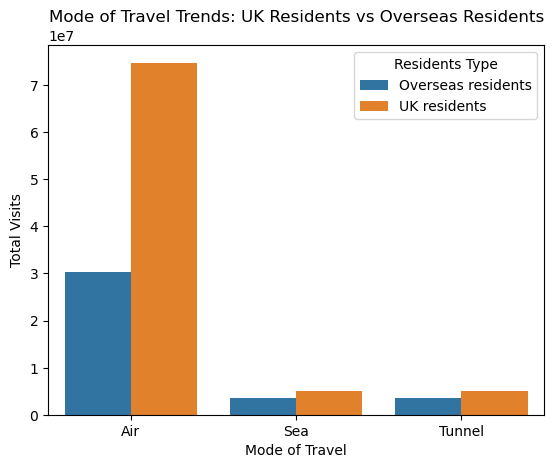

In [3]:
#Set the group spliting up UK and Overseas residents' modes of travelling, also demonsrate visiting number for each mode of the country
mode_travel_visits_raw = df.groupby(['ukos', 'mode'])['visits']    
#apply sum function to display the grouped dataset, and reset index for further step of visualization
mode_travel_visits = mode_travel_visits_raw.sum().reset_index()   

sns.barplot(x='mode', y='visits', hue='ukos', data = mode_travel_visits)   #barplot painting and import data
plt.title('Mode of Travel Trends: UK Residents vs Overseas Residents')   #Set title for the visualization
plt.xlabel('Mode of Travel')    #set the name for x-axis
plt.ylabel('Total Visits')    #set the name for y-axis
plt.legend(title='Residents Type')   #set the category name for hue
plt.show()   #show plt customization

Strategy #2:

The second method is to determine the number of visits by time, or quarters. Therefore, grouping the dataset by quarter is essential, which is why the groupby function is applied again. In this method, “quarter” is the way to group the dataset that was divided into four groups: “Jan-March”, “Apr-Jun”, “Jul-Sep”, and “Oct-Dec”. This line of code is named as “quarter_visits_raw”. For each group, the visit number is displayed as well. Similar to the previous method, the raw data is not displayed. Hence, the sum() function is utilized to display the list, and the reset_index() function is operated for the further step of visualization. This code of data is named as “quarter_visits”. This time, the line graph is selected to visualize the data since the purpose of this method is to discover the trend of visiting by time. Still, seaborn is used to import the relation plot. Inside the relplot() function, the data imported is “quarter_visits”. The “quarter” is set as the x-axis, “visits” is set as the y-axis, and operating the relation plot as a line plot. After that, Matplotlib.pyplot is used to customize the plot’s detail. The title is set as “Trend of Visiting”, the x-axis as “Quarter”, and the y-axis as “Total Visits”. After the customization, plt.show() is written to display them on the screen. 

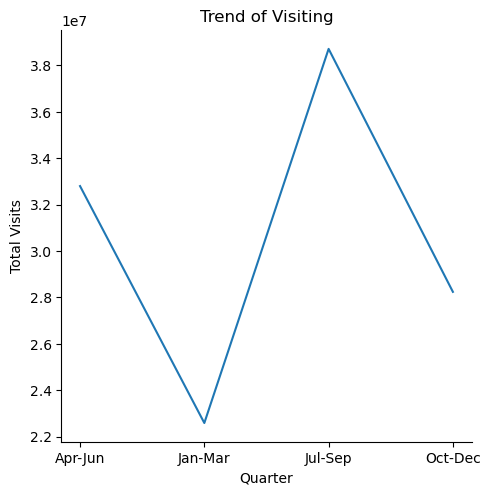

In [4]:
quarter_visits_raw = df.groupby(['quarter'])[['visits']]   #make the order by quarter and demonstrate the visiting number
#apply sum function to display the grouped dataset, and reset index for further step of visualization
quarter_visits = quarter_visits_raw.sum().reset_index()

sns.relplot(data = quarter_visits, x = 'quarter', y = 'visits', kind = 'line')   #line graph painting and import data, set x-axis and y-axis
plt.title('Trend of Visiting')   #set title
plt.xlabel('Quarter')   #set name for x-axis
plt.ylabel('Total Visits')   #set name for y-axis
plt.show()   #show the plt customization

Strategy #3:

The third method is to find out the top five countries that visit UK the United Kingdoms the most. To reach this purpose, dropping out the UK residents from the list is necessary. Firstly, insert in “df” to access the dataset, and then choose the column “ukos” and exclude the UK residents by applying “!=” that means not equal to. And then, apply “UK residents” into the code to exclude it from the “ukos”, which is why this line of code is named as “overseas”. And then, “groupby” function is operated to group the countries by accessing “country”, and see the “visits” of each country count. To reduce the steps needed, sum function and reset_index function are not separated from the groupby function anymore, and this step is named as “overseas_2”. However, they still function the same way as method 1 and method 2. The result displayed by “overseas_2” follows the order by countries’ first letter; meanwhile, the intention is to make a order by visiting number. Hence, the list is re-group again by “groupby” the visits and insert sum function and reset_index function to display the data. At this point, the data displayed is at the order from lowest to highest, and this line of code is named “overseas_3”. And the inverse the list, “iloc” function is required to select the row, which is accessing from “overseas_3” by its index number. And then, we change reverse the row’s order from low to high into high to low by applying [::-1] into the “iloc” function. The “:” accesses the elements from the starting index and the “:-1” index, which eventually enable the function to reverse. Then, since the goal is to find out the top 5 countries that visit the most, “head” function is applied and put 5 into the bracket, meaning the 5 countries that occupy the list are selected. This line of code is named “overseas_4”. The next step is to complete the visualization. In this visualization, seaborn is still being used. Different from method 1, catplot is applied, meaning the categorial plot. Inside the “catplot” function, overseas_4 is accessed by operating data = overseas_4;  “country” is set as the x-axis; “visits” is set as the y-axis; and the bar kind of categorial plot is selected. Identical to the previous methods, plt is utilized to customize the namings. The title of this visualization is set as “Countries Visiting Number Comparison”, the x-axis is set as “Countries”, the y-axis is set as “Total Visits”, and eventually display with plt.show(). 

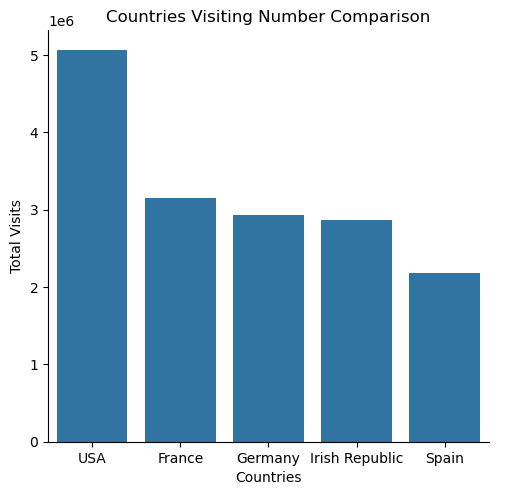

In [5]:
overseas = df[df['ukos'] != 'UK residents']   #exclude UK residents
overseas_2 = overseas.groupby(['country'])['visits'].sum().reset_index()   #group by country and demonstrate the visits number from each country
overseas_3 = overseas_2.groupby(['visits']).sum().reset_index()    #reset the order by number of visiting
overseas_4 = overseas_3.iloc[::-1].head(5)     #reverse the order and pick the top five countries of visiting

sns.catplot(data = overseas_4, x = 'country', y = 'visits', kind = 'bar')   #visualize bar chat with catplot, import data
plt.title('Countries Visiting Number Comparison')   #set title
plt.xlabel('Countries')   #set name for x-axis
plt.ylabel('Total Visits')   #set name for y-axis
plt.show()   #show plt customization

Results:

Analyzed from the dataset by applying different data analysis techniques, few findings are discovered. Visualized from Method 1: “Mode of Travel Trends: UK Residents vs. Overseas Residents”, both the UK residents and the Overseas residents prefer airplan as their transportation of traveling, compared to sea and tunnel. This can mean that the transportation of sea can be less convenient compared to the air due to long time travel. For tunnel, it’s usually used for short trips inside the UK or countries around the country. Connecting to the real life, many details do reflecting the validity of this dataset and the analysis. Comparing with countries like New York, Beijing, and Los Angeles, there are more airports in London, the financial center of Europe. Meanwhile, more people prefer to travel with tunnel and railways for trips inside the UK, allowing the travellers to enjoy the view outside the window and feels more comfortable on the ground. However, the tunnel is highly limited due to its inconvenience to access the nearby countries, which can be one of the reasons why the visits with tunnel is low. Same theory can also apply on the sea-transportation. Since the UK is separated from other parts of Europe by the English Channel, it takes more changes and longer time to get to the destination in other countries. For example, if a traveler is trying to go to Paris from London by sea, he might need to take the boat to a coastal city and then change to a train to Paris. Comparing to the direct flight, it is inefficient and unreliable. Therefore, the government might want to invest more money on the infrastructure of airport in order to support the intense air travel volumes and increase its capacity, while there many forms traveling of UK residents can occur, such as business, leisure, etc. 

In addition, visualized from the second method: “Trend of Visiting Across Quarters”, demonstrates the visits number time by quarters of 2023. In the first quarter, or Q1 from January to March, the visits are low. It can be caused by the cold of winter season, reducing the travel activity and intension. For Q2, from April to June, the visits increase to 3.3le7, showing that the recovery of visits. The reason for this can include the warmer weather, more holidays, and incoming summer vacation for students. For Q3, from July to September, the visits came to a peak of the year, reaching 3.8lle7 visits. Q3 is the time for summer holidays. Many students like to travel and hang out with friends during this time, facilitating the others to join along the way. For Q4, the visits drop down again due to the end of summer break and start of school. Also, Christmas occurs in this quarter, while people tend to go back home and spend more time with the families. At this point, during the terms with higher visits volume, the government may invest on propaganda of traveling to attract the tourism in order to make money. It will also require more resources like transportation and accommodation for the travelers. It will be a question of maintaining the balance. 

Moreover, visualized from the third method: “Countries Visiting Number Comparison”, shows the top 5 countries with visits to the UK for the most. In the graph, the USA is taking advantage of visits above all other countries, demonstrating an intense business connections. Except for the USA, the other countries that are listed in top 5 visits are all European countries, reflecting the tight relationship between the European Union, even though the UK has quitted. Hence, the UK may focus the marketing strategy on the USA since they won the highest visits to tne UK in order this source of visisors. In the meantime, the strategies can also be applied on the other 4 counties and their local companies. The UK may collaborate with the local airlines like Air Fracnce, American Airline, Iberia, Lufthansa to promote a cheaper flight plan coming to the UK in order to promote the tourism by bringing convenience to the visitors. 

Conclusion

Overall, this data analysis provides an insight into the tourism industry in the UK, allowing the public to access and get familiar with the current tourism industry. The three methods include comparing the modes of traveling between UK residents and Overseas residents, trend of visiting by quarters, and the top 5 countries visiting the UK. Combining the analysis for these data, we can conclude that the top most of the visits in UK prefer airplane as transportation of traveling. Among these overseas visitors, the Americans are the most and they prefer to visit the UK during Q3 that is between July to September. Therefore, for the UK, Q3 is a period of time that is worth to invest on airways and accomendation, highlighting by the summary above. Other than this, there are also a couple of things that the dataset cannot prove nor provide. The hidden reasons beneath the data are mysterious. The data is directly related to the trend of data, which includes numerous of reasons. In this data, the satisfaction of the visitors are not recorded, so the analysts cannot know their feeling about the stay and will they be the visitors return to the UK, potentially resulting in a misguided data for the people across the world to know the fact. Therefore, the personal data turn to be important for research because they are eligible to provide the actual feeling that the samples feel. However, it leads to another problem, which is the ethical use of personal data. The data’s utility can be operated in various fields of study, not only tourism, but also marketing, business, etc. It turns out that accessing the personal data is a challenge to both of the users and the data collectors themselves in the view of privacy protection. Hence, an encryption and secured environment of storing data is reflected, for protecting the privacy of the visitors and personal information. 